# SARIMA

Apakah kamu pernah mendengar tentang prediksi penjualan atau peramalan data? Bayangkan kamu adalah seorang pemilik toko yang ingin tahu berapa banyak barang yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Bagaimana kamu bisa tahu? Di sinilah SARIMA datang membantu!

SARIMA adalah singkatan dari Seasonal Autoregressive Integrated Moving Average. Ini adalah metode yang digunakan untuk memprediksi nilai di masa depan berdasarkan data yang sudah ada sebelumnya. SARIMA sangat bagus untuk data yang memiliki pola musiman, seperti penjualan bulanan.

### Fungsi SARIMA
Pikirkan SARIMA sebagai alat untuk menghitung dan menebak seberapa banyak barang yang akan terjual di bulan-bulan berikutnya. Berikut adalah langkah-langkah bagaimana SARIMA bekerja:
1. Mempelajari Data Sebelumnya: SARIMA melihat data penjualan bulan-bulan sebelumnya untuk menemukan pola. Misalnya, jika kamu melihat bahwa penjualan selalu meningkat di bulan Desember karena Natal, SARIMA akan mencatat hal itu.
2. Menghilangkan Tren dan Pola: Sebelum membuat prediksi, SARIMA bisa membantu menghilangkan tren yang tidak diinginkan (seperti penjualan yang selalu naik) dan pola musiman (seperti penjualan yang meningkat setiap akhir tahun).
3. Membuat Prediksi: Setelah mempelajari data dan menghilangkan pola yang tidak perlu, SARIMA akan membuat prediksi untuk bulan-bulan berikutnya. Misalnya, setelah melihat data sebelumnya, SARIMA mungkin menyimpulkan bahwa pada bulan Januari, penjualan diperkirakan akan mencapai 500 unit.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, SARIMA bisa membandingkan hasil prediksinya dengan data asli untuk melihat seberapa akurat prediksinya. Jika akurat, itu berarti SARIMA melakukan pekerjaan dengan baik!

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# 1. Penggunaan Data

In [2]:

df = pd.read_csv("penjualan.csv", sep=";")
display(df)

# Mengubah format data
# Fungsi id_vars untuk membaca baris
# Fungsi var_name untuk membaca kolom
# Fungsi value_name untuk membaca hasil
pisahdata = df.melt(id_vars=['Bulan'], var_name='Tahun', value_name='Sales')

# Mengubah kolom data sebelumnya yang sudah kita buat menjadi satu data tanggal yang utuh
pisahdata['Tanggal'] = pd.to_datetime(pisahdata['Tahun'] + ' ' + pisahdata['Bulan'])
# print(pisahdata)

# Mengatur Tanggal sebagai indeks dan memilih kolom yang relevan
sales_data = pisahdata.set_index('Tanggal')[['Sales']]

,Bulan,2020,2021,2022,2023
0,January,3488,4281,4396,3491
1,February,3764,3285,4664,3988
2,March,1437,1646,1755,1798
3,April,3667,3679,3560,3291
4,May,1349,1236,1669,1006
5,June,1411,1974,1097,1607
6,July,1157,1907,1064,1404
7,August,1166,1604,1327,1780
8,September,1873,1130,1575,1516
9,October,1991,1403,1601,1736


C:\Users\Acer\AppData\Local\Temp\ipykernel_2364\865597317.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pisahdata['Tanggal'] = pd.to_datetime(pisahdata['Tahun'] + ' ' + pisahdata['Bulan'])


In [3]:
display(sales_data)

,Sales
Tanggal,
2020-01-01,3488
2020-02-01,3764
2020-03-01,1437
2020-04-01,3667
2020-05-01,1349
2020-06-01,1411
2020-07-01,1157
2020-08-01,1166
2020-09-01,1873


# 2. Visualisasikan Data Bulanan Tersebut

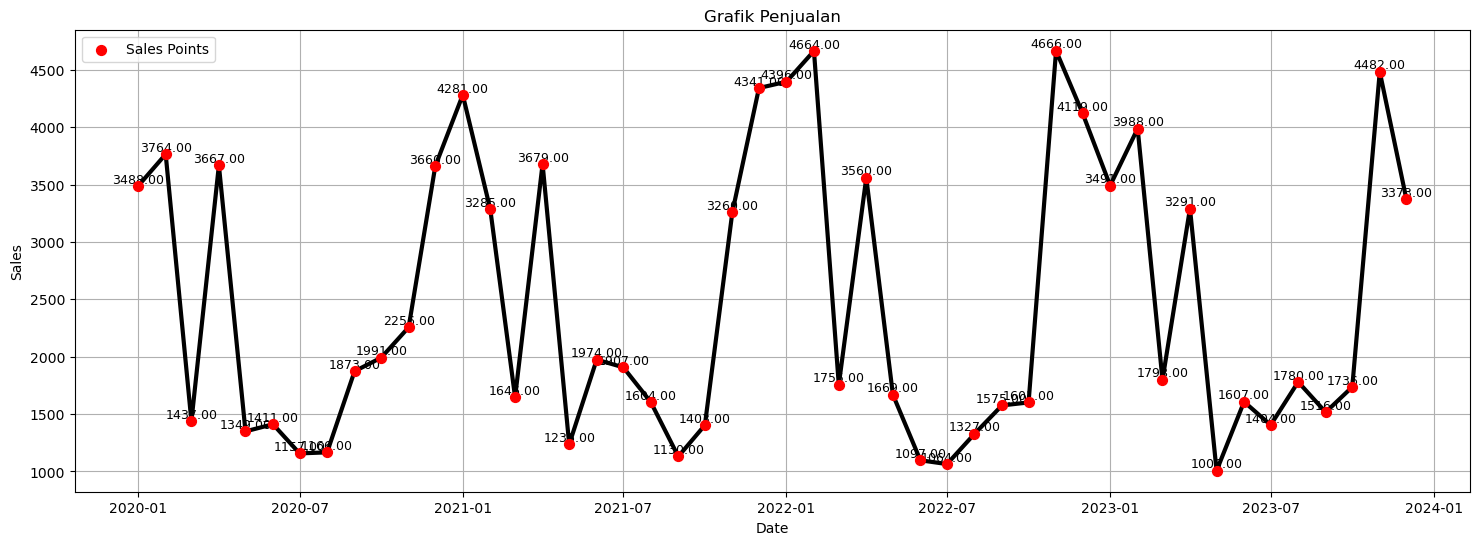

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6)) 

# Menggambar garis penjualan
plt.plot(sales_data['Sales'], linewidth=3, c='black') 

# Menambahkan titik pada setiap data penjualan
plt.scatter(sales_data.index, sales_data['Sales'], color='red', s=50, label='Sales Points', zorder=5) 

# Menambahkan tulisan nominal pada setiap titik
for i, value in enumerate(sales_data['Sales']):
    plt.text(sales_data.index[i], value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')
    
plt.title("Grafik Penjualan") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()  # Menampilkan legend
plt.grid()  # Menambahkan grid untuk lebih jelas
plt.show()


# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [5]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(sales_data['Sales'])

ADF Statistic: -4.941331621414812
p-value: 2.8958312320307786e-05
Statisioner: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah stasioner


# 4. Tentukan Parameter SARIMA

Tentukan parameter uji dan test

In [6]:
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

In [7]:
model_auto = auto_arima(train, seasonal=True, m=6, stepwise=True, trace=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=647.206, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=652.504, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=645.797, Time=0.02 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=647.239, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=713.295, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[6] intercept   : AIC=647.160, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[6] intercept   : AIC=618.889, Time=0.07 sec
 ARIMA(1,0,0)(2,0,1)[6] intercept   : AIC=616.442, Time=0.11 sec
 ARIMA(1,0,0)(1,0,1)[6] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(2,0,2)[6] intercept   : AIC=618.080, Time=0.15 sec
 ARIMA(1,0,0)(1,0,2)[6] intercept   : AIC=627.818, Time=0.15 sec
 ARIMA(0,0,0)(2,0,1)[6] intercept   : AIC=616.536, Time=0.08 sec
 ARIMA(2,0,0)(2,0,1)[6] intercept   : AIC=618.264, Time=0.14 sec
 ARIMA(1,0,1)(2,0,1)[6] intercept   : AIC=618.328, Time=0.14 sec
 ARIMA(0,0,1)(2,0,1)[6] intercept   : AIC=617.541, 

## Pada SARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

### P
- memiliki fungsi yang sama dengan p, tetapi pada P melihat pola tahunan

### D 
- D adalah “differencing” untuk menghilangkan pola musiman.
- Ini bekerja pada pola yang berulang setiap musim. Misalnya, jika penjualan selalu naik di akhir tahun, itu adalah pola musiman tahunan.
- D membantu menghilangkan pola berulang ini dengan membandingkan nilai saat ini dengan nilai yang sama di musim sebelumnya. Jika musimnya tahunan dan data bulanan, maka kita bandingkan nilai sekarang dengan nilai 12 bulan sebelumnya.
- Contoh: Kalau D=1, kita akan melihat perbedaan nilai penjualan dengan nilai satu tahun sebelumnya (12 bulan lalu).

### Q 
- Q mirip dengan q, tetapi pada Q melihat pola tahunan.

### S
- s adalah jumlah bulan dalam satu musim. Kalau data kamu bulanan dan pola musimnya tahunan, maka s=12.

In [8]:
# p, d, q = model_auto.order
# P, D, Q, s = model_auto.seasonal_order  

p, d, q = 2,2,1
P, D, Q, s = 1,1,2,12

# 5. Latih Model SARIMA

In [9]:
model = SARIMAX(sales_data, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
results = model.fit()
results2 = model.fit()
model

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


# 6. Prediksi Periode Mendatang dengan SARIMA

In [10]:
Periode = 12

# Lakukan prediksi dengan eksogen masa depan
Prediksi = results.get_forecast(steps=Periode)
Rata_Prediksi = Prediksi.predicted_mean
Confiden_Interval_Prediksi = Prediksi.conf_int()
print(Prediksi)

In [11]:
# Menampilkan hasil prediksi
print("Rata-rata Prediksi Bulanan:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

Rata-rata Prediksi Bulanan:


2024-01-01    3177.471548
2024-02-01    3787.818749
2024-03-01    1249.892956
2024-04-01    2741.353952
2024-05-01     572.229533
2024-06-01     887.310038
2024-07-01     644.138840
2024-08-01     927.713007
2024-09-01     726.283000
2024-10-01     856.305408
2024-11-01    3532.602301
2024-12-01    2632.822470
Freq: MS, Name: predicted_mean, dtype: float64


Interval Kepercayaan Prediksi (Lower, Upper):


,lower Sales,upper Sales
2024-01-01,1869.246945,4485.696151
2024-02-01,2187.928783,5387.708715
2024-03-01,-452.506708,2952.292620
2024-04-01,819.968781,4662.739124
2024-05-01,-1577.431353,2721.890419
2024-06-01,-1427.944446,3202.564523
2024-07-01,-1842.148820,3130.426499
2024-08-01,-1741.582640,3597.008654
2024-09-01,-2113.776407,3566.342408
2024-10-01,-2148.859005,3861.469821


## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

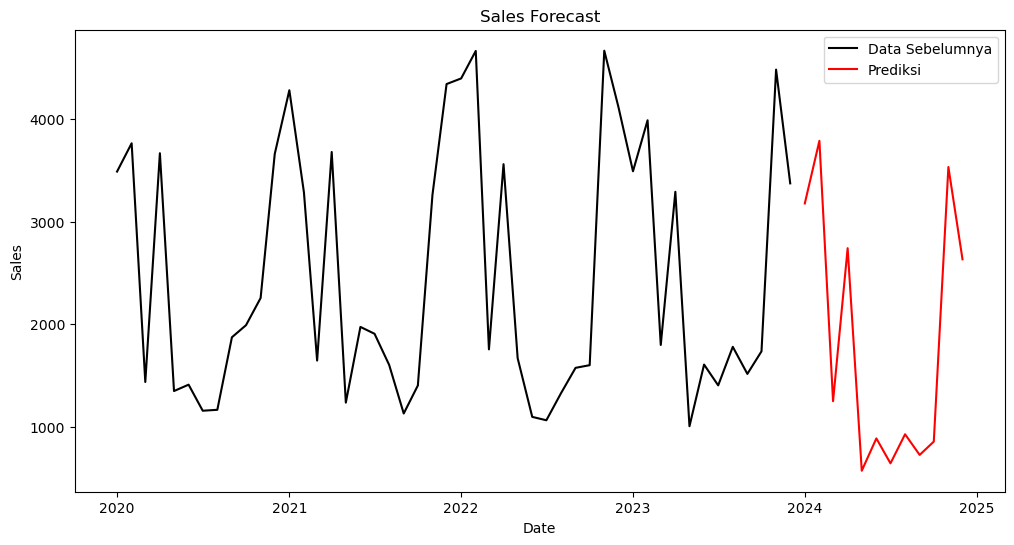

In [12]:
# Visualisasi Prediksi
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

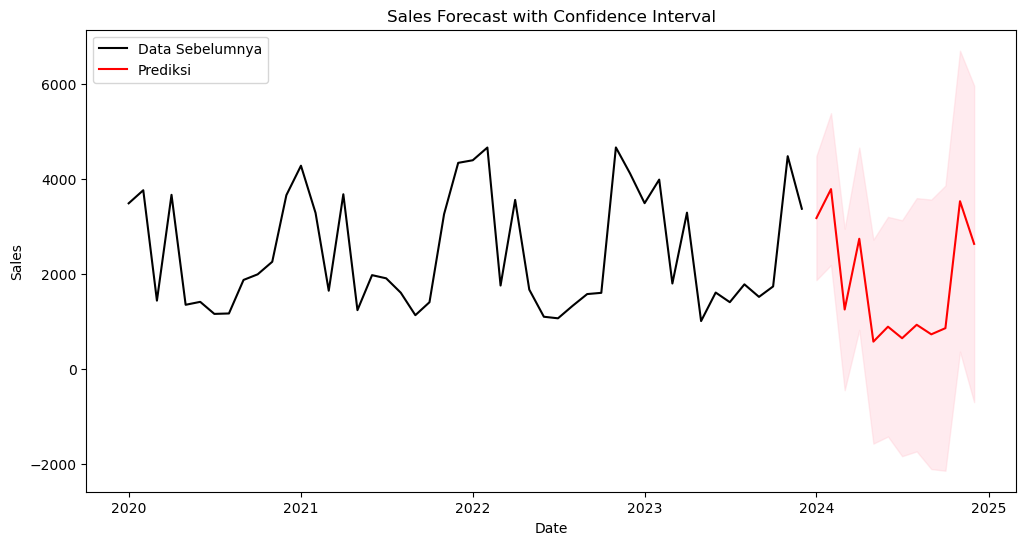

In [13]:
# Visualisasi dengan Interval Kepercayaan
plt.figure(figsize=(12, 6)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink', alpha=0.3) 
plt.title("Sales Forecast with Confidence Interval") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# Prediksi bulan sebelumnya dan menilai dengan mape mae dan mse

ini adalah train data 
            Sales
Tanggal          
2020-01-01   3488
2020-02-01   3764
2020-03-01   1437
2020-04-01   3667
2020-05-01   1349
2020-06-01   1411
2020-07-01   1157
2020-08-01   1166
2020-09-01   1873
2020-10-01   1991
2020-11-01   2256
2020-12-01   3660
2021-01-01   4281
2021-02-01   3285
2021-03-01   1646
2021-04-01   3679
2021-05-01   1236
2021-06-01   1974
2021-07-01   1907
2021-08-01   1604
2021-09-01   1130
2021-10-01   1403
2021-11-01   3260
2021-12-01   4341
2022-01-01   4396
2022-02-01   4664
2022-03-01   1755
2022-04-01   3560
2022-05-01   1669
2022-06-01   1097
2022-07-01   1064
2022-08-01   1327
2022-09-01   1575
2022-10-01   1601
2022-11-01   4666
2022-12-01   4119
ini adalah test data 
            Sales
Tanggal          
2023-01-01   3491
2023-02-01   3988
2023-03-01   1798
2023-04-01   3291
2023-05-01   1006
2023-06-01   1607
2023-07-01   1404
2023-08-01   1780
2023-09-01   1516
2023-10-01   1736
2023-11-01   4482
2023-12-01   3373


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



Interval Kepercayaan Prediksi (Lower, Upper):


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,lower Sales,upper Sales
2023-01-01,2950.014572,6041.961026
2023-02-01,3299.432325,6993.514916
2023-03-01,57.496120,4075.030236
2023-04-01,1615.293376,6247.179119
2023-05-01,-641.912502,4548.164700
2023-06-01,-1317.062322,4337.537312
2023-07-01,-1701.436851,4454.877217
2023-08-01,-1779.383279,4883.129348
2023-09-01,-1766.699197,5380.800258
2023-10-01,-2025.254544,5608.394015


test data:            Sales
Tanggal          
2023-01-01   3491
2023-02-01   3988
2023-03-01   1798
2023-04-01   3291
2023-05-01   1006
2023-06-01   1607
2023-07-01   1404
2023-08-01   1780
2023-09-01   1516
2023-10-01   1736
2023-11-01   4482
2023-12-01   3373
predicted_mean: 2023-01-01    4495.987799
2023-02-01    5146.473621
2023-03-01    2066.263178
2023-04-01    3931.236247
2023-05-01    1953.126099
2023-06-01    1510.237495
2023-07-01    1376.720183
2023-08-01    1551.873034
2023-09-01    1807.050531
2023-10-01    1791.569736
2023-11-01    4345.125262
2023-12-01    4201.061847
Freq: MS, Name: predicted_mean, dtype: float64
MAE: 473.5677570152611
MSE: 382112.13717573805
MAPE: 21.42854623651842%
Nilai MAPE untuk Model Hybrid SARIMA adalah: 21.42854623651842 %


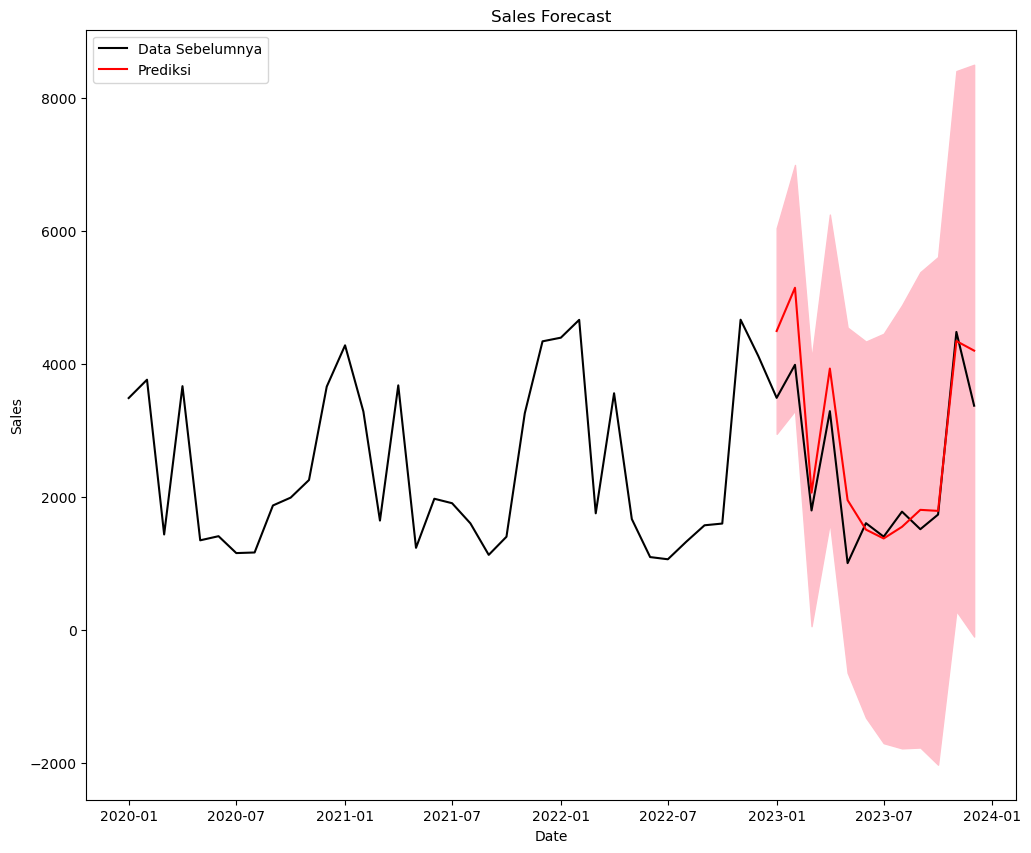

In [14]:
train_data = sales_data[:-12]
test_data = sales_data[-12:]
Periode = 12
print(f"""ini adalah train data 
{train_data}""")

print(f"""ini adalah test data 
{test_data}""")
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Lakukan prediksi dengan eksogen masa depan
forecast = results.get_forecast(steps=Periode)

# forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
# kedua teknik hidung mape ini adalah sama
mape2 = mean_absolute_percentage_error(test_data, predicted_mean) * 100
mape = np.mean(np.abs((test_data.values.flatten() - predicted_mean.values.flatten()) / test_data.values.flatten())) * 100
print(f"test data:{test_data}")
print(f"predicted_mean: {predicted_mean}")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')
print("Nilai MAPE untuk Model Hybrid SARIMA adalah:", mape2, "%")

plt.figure(figsize=(12, 10)) 
plt.plot(sales_data, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [15]:
display(predicted_mean)
display(test_data)

2023-01-01    4495.987799
2023-02-01    5146.473621
2023-03-01    2066.263178
2023-04-01    3931.236247
2023-05-01    1953.126099
2023-06-01    1510.237495
2023-07-01    1376.720183
2023-08-01    1551.873034
2023-09-01    1807.050531
2023-10-01    1791.569736
2023-11-01    4345.125262
2023-12-01    4201.061847
Freq: MS, Name: predicted_mean, dtype: float64

,Sales
Tanggal,
2023-01-01,3491
2023-02-01,3988
2023-03-01,1798
2023-04-01,3291
2023-05-01,1006
2023-06-01,1607
2023-07-01,1404
2023-08-01,1780
2023-09-01,1516


# Linear regresion

In [16]:
combined_data = test_data.join(predicted_mean)
combined_data = combined_data.reset_index()
print(combined_data)

      Tanggal  Sales  predicted_mean
0  2023-01-01   3491     4495.987799
1  2023-02-01   3988     5146.473621
2  2023-03-01   1798     2066.263178
3  2023-04-01   3291     3931.236247
4  2023-05-01   1006     1953.126099
5  2023-06-01   1607     1510.237495
6  2023-07-01   1404     1376.720183
7  2023-08-01   1780     1551.873034
8  2023-09-01   1516     1807.050531
9  2023-10-01   1736     1791.569736
10 2023-11-01   4482     4345.125262
11 2023-12-01   3373     4201.061847


In [17]:
xlr = combined_data.drop(["predicted_mean","Tanggal"], axis=1)
ylr = combined_data["predicted_mean"]
display(xlr,ylr)

,Sales
0,3491
1,3988
2,1798
3,3291
4,1006
5,1607
6,1404
7,1780
8,1516
9,1736


0     4495.987799
1     5146.473621
2     2066.263178
3     3931.236247
4     1953.126099
5     1510.237495
6     1376.720183
7     1551.873034
8     1807.050531
9     1791.569736
10    4345.125262
11    4201.061847
Name: predicted_mean, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xlr, ylr)
lineartestvalue = model.predict(xlr)
print(lineartestvalue)

[4034.29678224 4603.91946085 2093.91208429 3805.07236429 1186.1833892
 1875.00276515 1642.33998093 2073.28188667 1770.70565498 2022.85251472
 5170.10377319 3899.05437565]


In [19]:
mae = mean_absolute_error(ylr, lineartestvalue)
mse = mean_squared_error(ylr, lineartestvalue)
mape = mean_absolute_percentage_error(ylr, lineartestvalue) * 100
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

r_squared = r2_score(ylr, lineartestvalue)
r_value = np.sqrt(r_squared) 
if r_squared >= 0:
    r_value = np.sqrt(r_squared)
else:
    r_value = -np.sqrt(abs(r_squared))  # R-squared negatif, ambil nilai negatif
print("R-squared:", r_squared)
print("R-value (korelasi):", r_value)

MAE: 372.61735281496794
MSE: 201207.66839707227
MAPE: 15.230595096478888%
R-squared: 0.8926422747392511
R-value (korelasi): 0.944797478160929


# Prediksi 12 bulan mendatang 

In [20]:
print(Rata_Prediksi)

2024-01-01    3177.471548
2024-02-01    3787.818749
2024-03-01    1249.892956
2024-04-01    2741.353952
2024-05-01     572.229533
2024-06-01     887.310038
2024-07-01     644.138840
2024-08-01     927.713007
2024-09-01     726.283000
2024-10-01     856.305408
2024-11-01    3532.602301
2024-12-01    2632.822470
Freq: MS, Name: predicted_mean, dtype: float64


In [21]:
Rata_Prediksi_df = pd.DataFrame(Rata_Prediksi)
Rata_Prediksi_df.rename(columns={"predicted_mean": "Sales"}, inplace=True)
print(Rata_Prediksi_df)

                  Sales
2024-01-01  3177.471548
2024-02-01  3787.818749
2024-03-01  1249.892956
2024-04-01  2741.353952
2024-05-01   572.229533
2024-06-01   887.310038
2024-07-01   644.138840
2024-08-01   927.713007
2024-09-01   726.283000
2024-10-01   856.305408
2024-11-01  3532.602301
2024-12-01  2632.822470


In [22]:
prediksi_hybrid = model.predict(Rata_Prediksi_df)
print(prediksi_hybrid)

[3674.95489769 4374.48730691 1465.71449354 3175.11088769  689.02947549
 1050.1502022   771.44631993 1096.45693677  865.59355676 1014.61511084
 4081.97809825 3050.72055794]


In [23]:
Rata_Prediksi_df = Rata_Prediksi_df.reset_index().rename(columns={"index": "tanggal"})
Rata_Prediksi_df = Rata_Prediksi_df.drop(["Sales"], axis=1)
print(Rata_Prediksi_df)

dfnewnew = pd.DataFrame(prediksi_hybrid)
dfnewnew.rename(columns={0: "Prediksi_12_bulan_mendatang"}, inplace=True)
print(dfnewnew)

combineprediksi = Rata_Prediksi_df.join(dfnewnew)
print(combineprediksi)


      tanggal
0  2024-01-01
1  2024-02-01
2  2024-03-01
3  2024-04-01
4  2024-05-01
5  2024-06-01
6  2024-07-01
7  2024-08-01
8  2024-09-01
9  2024-10-01
10 2024-11-01
11 2024-12-01
    Prediksi_12_bulan_mendatang
0                   3674.954898
1                   4374.487307
2                   1465.714494
3                   3175.110888
4                    689.029475
5                   1050.150202
6                    771.446320
7                   1096.456937
8                    865.593557
9                   1014.615111
10                  4081.978098
11                  3050.720558
      tanggal  Prediksi_12_bulan_mendatang
0  2024-01-01                  3674.954898
1  2024-02-01                  4374.487307
2  2024-03-01                  1465.714494
3  2024-04-01                  3175.110888
4  2024-05-01                   689.029475
5  2024-06-01                  1050.150202
6  2024-07-01                   771.446320
7  2024-08-01                  1096.456937
8  2024-09-01  